
## Libraries

In [104]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.dummy import DummyClassifier

In [105]:
df = pd.read_csv('application_data.csv')

### Data

In [106]:
print(df)

print('\n')

print('Dataset Dimension: ', end='')
print(df.shape)

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

## Columns

In [107]:
print(df.columns.to_list())

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

# Exploratory Data Analysis

### Missing Values

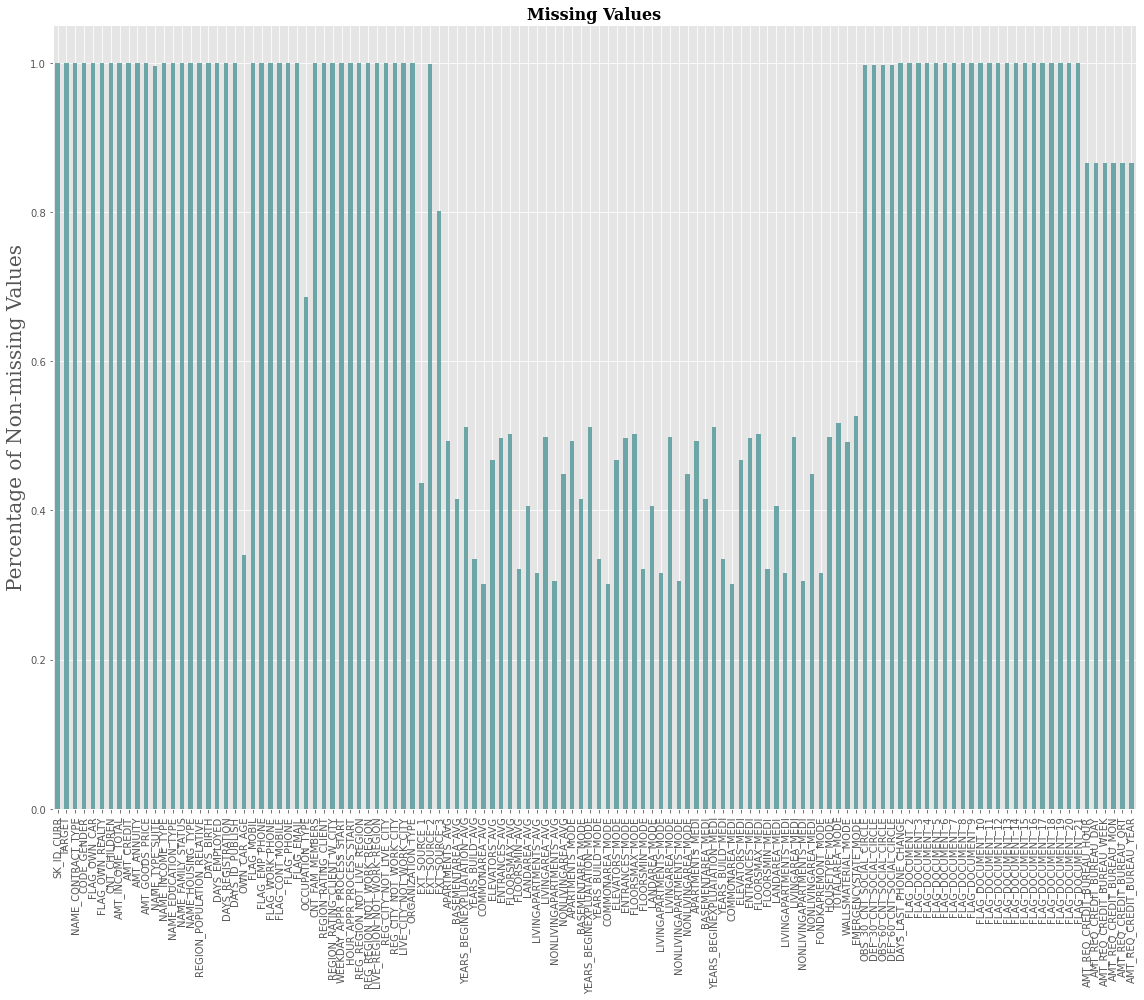

In [108]:
fig, ax = plt.subplots(figsize=(16,14))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax, color='cadetblue', alpha=0.9)
plt.title('Missing Values', fontsize=16,fontfamily='serif', fontweight='bold')
plt.ylabel('Percentage of Non-missing Values', fontsize=20, fontfamily='serif')
plt.tight_layout()
plt.show()

In [109]:
print('Missing Values Count: ')
print('\n')
print(df.isnull().sum())

Missing Values Count: 


SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


### Default Summary

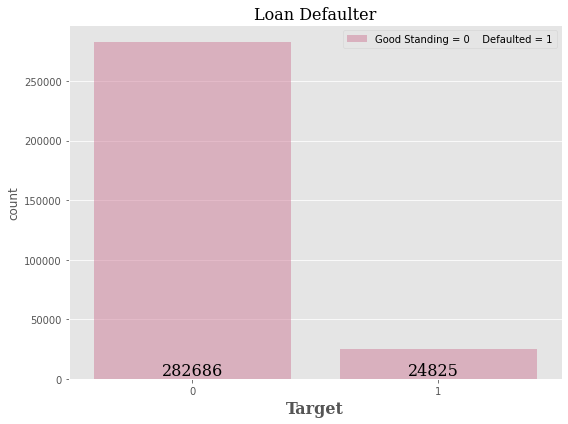

Target Summary: 
0    282686
1     24825
Name: TARGET, dtype: int64


In [110]:
plt.figure(figsize=(8,6))
sns.countplot(x='TARGET', data=df, color="palevioletred", alpha=0.5)
plt.xlabel('Target', fontsize=16, fontfamily='serif', fontweight='bold')
plt.legend(['Good Standing = 0'
           '    Defaulted = 1'])
text_1 = '282686'
text_2 = '24825'
plt.text(0.0,0.0, text_1, horizontalalignment='center', verticalalignment='bottom',fontsize=16, fontfamily='serif')
plt.text(0.98,-550.0, text_2, horizontalalignment='center', verticalalignment='bottom',fontsize=16, fontfamily='serif')
plt.title('Loan Defaulter', fontsize=16, fontfamily='serif')
plt.tight_layout()
plt.show()

print('Target Summary: ')
print(df['TARGET'].value_counts())

# Financial Products

### Cash Loans

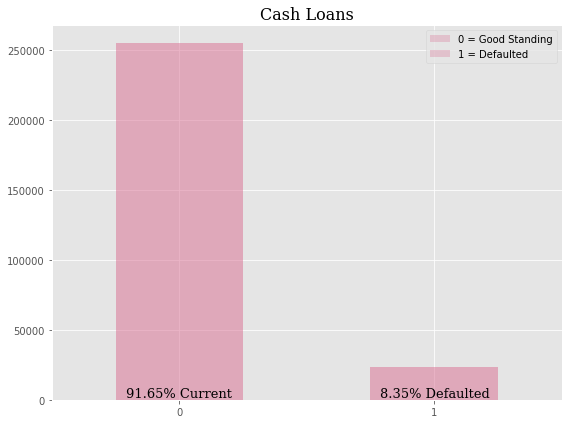

Cash Loans: 
0    255011
1     23221
Name: TARGET, dtype: int64


In [111]:
loan = df['TARGET'].groupby(df['NAME_CONTRACT_TYPE'])

cash = loan.get_group('Cash loans').value_counts()
revolving = loan.get_group('Revolving loans').value_counts()


plt.figure(figsize=(8,6))
cash.plot(kind='bar', label='0 = Good Standing', color='palevioletred',alpha=0.3)
cash.plot(kind='bar', label='1 = Defaulted', color='palevioletred',alpha=0.3)
plt.xticks(rotation=0)
text1='8.35% Defaulted'
text2 = '91.65% Current'
plt.text(.789, -5, text1, fontsize=13, fontfamily='serif', verticalalignment='bottom')
plt.text(-.21, 16.1, text2, fontsize=13, fontfamily='serif', verticalalignment='bottom')
plt.legend()
plt.title('Cash Loans', fontsize=16, fontfamily='serif')
plt.tight_layout()
plt.show()

print('Cash Loans: ')
print(cash)

### Revolving Loans

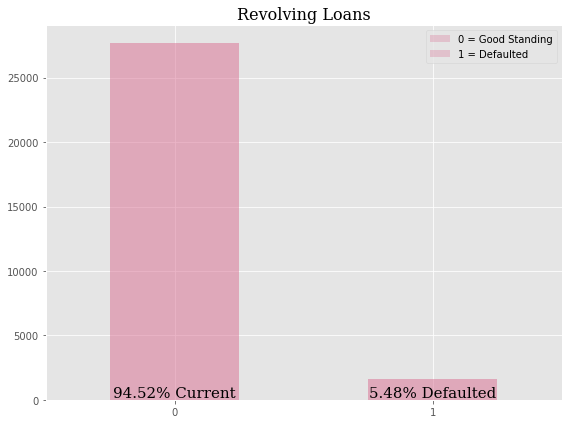

Revolving Loans: 
0    27675
1     1604
Name: TARGET, dtype: int64


In [112]:
plt.figure(figsize=(8,6))
revolving.plot(kind='bar', label='0 = Good Standing', color='palevioletred',alpha=0.3)
revolving.plot(kind='bar', label='1 = Defaulted', color='palevioletred',alpha=0.3)
plt.xticks(rotation=0)
text='5.48% Defaulted'
text_ = '94.52% Current'
plt.text(.752, -5, text, fontsize=15, fontfamily='serif', verticalalignment='bottom')
plt.text(-.241, -5, text_, fontsize=15, fontfamily='serif', verticalalignment='bottom')
plt.legend()
plt.title('Revolving Loans', fontsize=16, fontfamily='serif')
plt.tight_layout()
plt.show()

print('Revolving Loans: ')
print(revolving)

### Defaults vs Good Standing on Financial Products

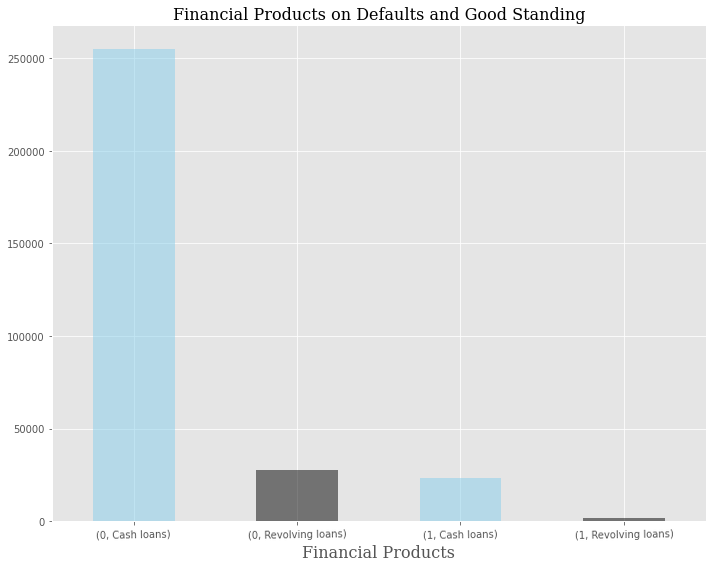

In [113]:
plt.figure(figsize=(10,8))
df[['TARGET','NAME_CONTRACT_TYPE']].value_counts().plot(kind='bar', color=['skyblue', 'black'], alpha=0.5)
plt.xticks(rotation=1)
plt.title('Financial Products on Defaults and Good Standing', fontsize=16, fontfamily='serif')
plt.xlabel('Financial Products', fontsize=16, fontfamily='serif')
plt.tight_layout()
plt.show()

# Consumers

### Total Consumers by Gender

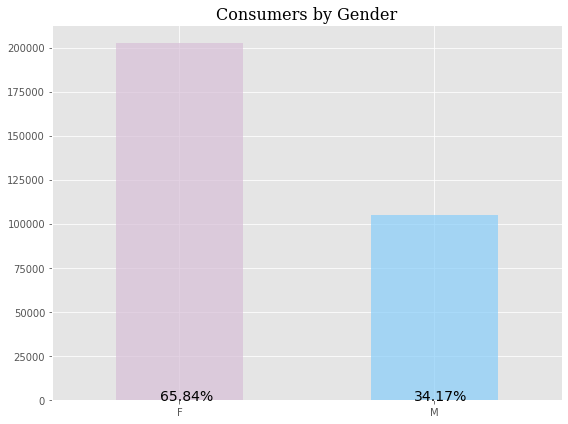

Gender Summary: 
F    202448
M    105059
Name: CODE_GENDER, dtype: int64


In [114]:
#Removing category XNA
df['CODE_GENDER'] = df['CODE_GENDER'].astype('category')
df['CODE_GENDER'] = df['CODE_GENDER'].cat.remove_categories('XNA')

ftxt = '65.84%'
mtxt = '34.17%'

plt.figure(figsize=(8,6))
df['CODE_GENDER'].value_counts().plot(kind='bar', color=['thistle', 'lightskyblue'], alpha=0.70)
plt.text(-0.078,0.0, ftxt, fontsize=14)
plt.text(0.920,0.0, mtxt, fontsize=14)
plt.title('Consumers by Gender', fontsize=16, fontfamily='serif')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print('Gender Summary: ')
print(df['CODE_GENDER'].value_counts())

### Default Summary by Gender
#### [ 0 = Good Standing, 1 = Defaulted ]

In [115]:
gender = df['TARGET'].groupby(df['CODE_GENDER'])

female_code = gender.get_group('F')
male_code = gender.get_group('M')

default_gender = pd.DataFrame()
default_gender['female'] = female_code.value_counts()
default_gender['male'] = male_code.value_counts()

<Figure size 864x720 with 0 Axes>

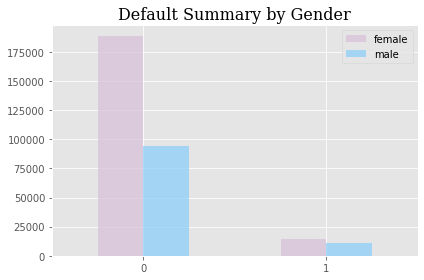

   female   male
0  188278  94404
1   14170  10655


In [116]:
plt.figure(figsize=(12,10))
default_gender.plot(kind='bar', color=['thistle', 'lightskyblue'], alpha=0.7)
plt.title('Default Summary by Gender', fontsize=16, fontfamily='serif')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(default_gender)

# Correlation for Defaulting

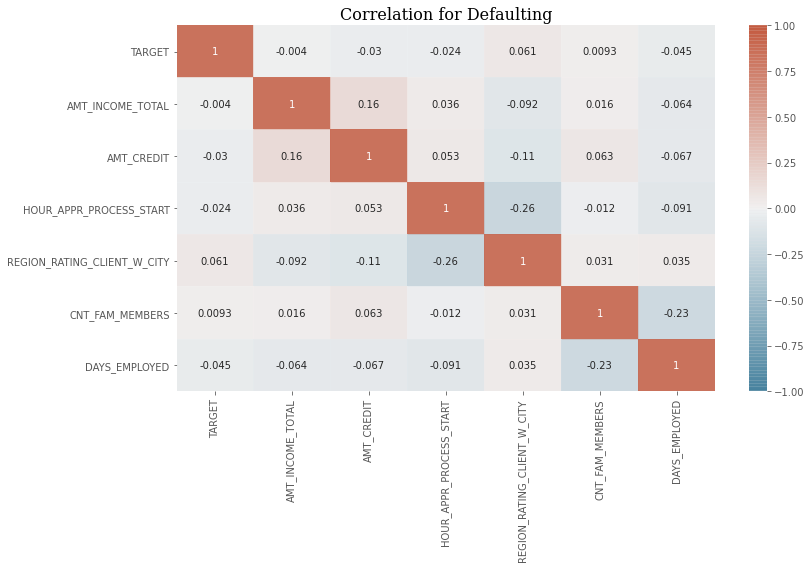

In [117]:
df_mx = df[['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'HOUR_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CITY','CNT_FAM_MEMBERS', 'DAYS_EMPLOYED', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE']]

corr = df_mx.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, alpha=0.8, cmap=cmap, vmin=-1, vmax=1)
plt.title('Correlation for Defaulting', fontsize=16, fontfamily='serif')
plt.tight_layout()
plt.show()

# Creating Classification Model

In [118]:
one_hot = preprocessing.LabelEncoder()
df['NAME_EDUCATION_TYPE'] = one_hot.fit_transform(df['NAME_EDUCATION_TYPE'])
df['NAME_FAMILY_STATUS'] = one_hot.fit_transform(df['NAME_FAMILY_STATUS'])
df['NAME_INCOME_TYPE'] = one_hot.fit_transform(df['NAME_INCOME_TYPE'])
df['NAME_HOUSING_TYPE'] = one_hot.fit_transform(df['NAME_HOUSING_TYPE'])

X = df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'HOUR_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CITY','DAYS_EMPLOYED',
        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']]
y = df['TARGET']

In [119]:
ros = RandomOverSampler(random_state=1)
x_ros, y_ros = ros.fit_resample(X, y)
scaler = StandardScaler()
scaler.fit(x_ros)
scaled_x = scaler.transform(x_ros)

In [120]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y_ros, test_size=0.20, random_state=0,shuffle=True)

### Logistic Model

In [121]:
model = LogisticRegression(C=1, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, n_jobs=1, penalty='l2',random_state=42, solver='liblinear')
model.fit(x_train,y_train)

model_predict = model.predict(x_test)
print(confusion_matrix(y_test, model_predict))
print(classification_report(y_test, model_predict))
print('Logistic Regression Accuracy: ', model.score(x_test,y_test) *100, '%')

[[26999 29327]
 [18174 38575]]
              precision    recall  f1-score   support

           0       0.60      0.48      0.53     56326
           1       0.57      0.68      0.62     56749

    accuracy                           0.58    113075
   macro avg       0.58      0.58      0.58    113075
weighted avg       0.58      0.58      0.58    113075

Logistic Regression Accuracy:  57.99159849657307 %


### Gaussian Model

In [122]:
nb = GaussianNB(priors=None, var_smoothing=1e-09)
nb.fit(x_train,y_train)
model_predict2 = nb.predict(x_test)
print(confusion_matrix(y_test, model_predict2))
print(classification_report(y_test, model_predict2))
print('Naive Bayes Accuracy: ', nb.score(x_test, y_test) *100, '%')

[[52477  3849]
 [51237  5512]]
              precision    recall  f1-score   support

           0       0.51      0.93      0.66     56326
           1       0.59      0.10      0.17     56749

    accuracy                           0.51    113075
   macro avg       0.55      0.51      0.41    113075
weighted avg       0.55      0.51      0.41    113075

Naive Bayes Accuracy:  51.283661286756576 %


### Dummy Model

In [123]:
dm = DummyClassifier(strategy='stratified', random_state=2)
dm.fit(x_train, y_train)
model_predict3 = dm.predict(x_test)
print(confusion_matrix(y_test, model_predict3))
print(classification_report(y_test, model_predict3))
print('DummyClassifier Accuracy: ', dm.score(x_test, y_test)*100)

[[28338 27988]
 [28420 28329]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     56326
           1       0.50      0.50      0.50     56749

    accuracy                           0.50    113075
   macro avg       0.50      0.50      0.50    113075
weighted avg       0.50      0.50      0.50    113075

DummyClassifier Accuracy:  50.11452575724077
